# Evaluating the Model on New Data

In [ ]:
# Mount to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing relevant libraries
import torch
import torchvision.models as models
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets
from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt
from torch.utils.data import Subset
import numpy as np

In [ ]:
#Get who is running the file

user = input("Who is running this file?: ")
print(f"The model is being run by {user}")

Who is running this file?: sean
The model is being run by sean


### Loading Networks

In [ ]:
# Load AlexNet
alexNet = models.alexnet(pretrained=True)

# Model Architecture
class CNN_Classifier_for_ALNC(nn.Module):
    def __init__(self):
        super(CNN_Classifier_for_ALNC, self).__init__()
        self.name = "CNN_Classifier"
        self.conv1 = nn.Conv2d(256, 128, 3, 1, 3)  # in_channels, out_channels, kernel_size
        self.pool = nn.MaxPool2d(2, 2)  # kernel_size, stride
        self.conv2 = nn.Conv2d(128, 64, 2, 1, 1, 1)  # in_channels, out_channels, kernel_size
        self.fc1 = nn.Linear(64 * 3 * 3, 256)
        self.fc2 = nn.Linear(256, 6)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 3 * 3)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Loading model checkpoints
model = CNN_Classifier_for_ALNC()

checkpoint = None

if user.lower() == 'sean':
  checkpoint = torch.load('/content/drive/MyDrive/University/Third_Year/APS360/APS360_Project/Final_Deliverable/The_HurriScan_Project_Implementation_of_the_Top_Performing_Model/Our best checkpoint file/all checkpoints from best model/model_CNN_Classifier_bs64_lr0.01_epoch4', map_location=torch.device('cpu'))
elif user.lower() == 'thardchi':
  checkpoint = torch.load('/content/drive/MyDrive/APS360_Team_11_Project_Folder/Final_Deliverable/The_HurriScan_Project_Implementation_of_the_Top_Performing_Model/Our best checkpoint file/NEW_model_CNN_Classifier_bs64_lr0.01_epoch3', map_location=torch.device('cpu'))
model.load_state_dict(checkpoint)
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 125MB/s]


CNN_Classifier_for_ALNC(
  (conv1): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(3, 3))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(128, 64, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=576, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=6, bias=True)
)

### Visualizing the model and exporting the flowchart



In [ ]:
from torchsummary import summary
summary(model, (256, 6, 6))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 128, 10, 10]         295,040
         MaxPool2d-2            [-1, 128, 5, 5]               0
            Conv2d-3             [-1, 64, 6, 6]          32,832
         MaxPool2d-4             [-1, 64, 3, 3]               0
            Linear-5                  [-1, 256]         147,712
            Linear-6                    [-1, 6]           1,542
Total params: 477,126
Trainable params: 477,126
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.04
Forward/backward pass size (MB): 0.15
Params size (MB): 1.82
Estimated Total Size (MB): 2.00
----------------------------------------------------------------


In [ ]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=f93ea319faf2f734785da7548af92dcd3a20bca6e318c9161d2f1ab4679a0c46
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [ ]:
import torchvision
from torchviz import make_dot

# Move the model to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

# Create a dummy input on the same device
dummy_input = torch.randn(1, 256, 6, 6).to(device)

# Use torchviz to create a graph visualization
dot = make_dot(model(dummy_input), params=dict(model.named_parameters()))

output_file_path = '/content/drive/MyDrive/APS360_Team_11_Project_Folder/Final_Deliverable/The_HurriScan_Project_Implementation_of_the_Top_Performing_Model/model'  # Change the path as needed
dot.render(output_file_path, format='png')

'/content/drive/MyDrive/APS360_Team_11_Project_Folder/Final_Deliverable/The_HurriScan_Project_Implementation_of_the_Top_Performing_Model/model.png'

## Evaluating on OTIS Data for Generalization

tensor([[ -5.4020,   8.4590, -10.0861,   1.4821,   6.7962,  -5.1891]],
       grad_fn=<AddmmBackward0>)
Day: 24th October 2023 ; Hour: 21
Predicted class: 1, Probability: 0.8399
tensor([[ -3.7676,  11.9965, -16.2031,  -1.6553,  10.2518,  -5.6652]],
       grad_fn=<AddmmBackward0>)
Day: 24th October 2023 ; Hour: 22
Predicted class: 1, Probability: 0.8513
tensor([[-7.4252,  0.0260, -6.1815, -1.6624,  3.1558,  9.5995]],
       grad_fn=<AddmmBackward0>)
Day: 24th October 2023 ; Hour: 23
Predicted class: 5, Probability: 0.9983


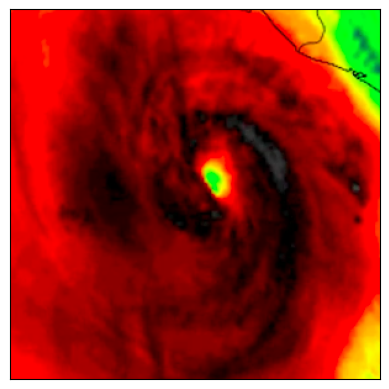

In [ ]:
#ITERATE THROUGH IMAGES OF OTIS THE DAY BEFORE IT HIT LAND

hour = 21

while (hour < 24):
  if user.lower() == "thardchi":
    sample1 = f'/content/drive/MyDrive/APS360_Team_11_Project_Folder/Final_Deliverable/The_HurriScan_Project_Implementation_of_the_Top_Performing_Model/sample/24-10-2023-{hour}-UTC.png'
  elif user.lower() == "sean":
    sample1 = f'/content/drive/MyDrive/University/Third_Year/APS360/APS360_Project/Final_Deliverable/The_HurriScan_Project_Implementation_of_the_Top_Performing_Model/sample/24-10-2023-{hour}-UTC.png'
  elif user.lower() == "charlotte":
    sample1 = "CHARLOTTE PATH"
  data_transform = transforms.Compose([
      transforms.Resize((224, 224)),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
  ])
  image = Image.open(sample1)
  image = image.convert("RGB")
  plt.imshow(image), plt.xticks([]), plt.yticks([])
  image = data_transform(image)
  image = image.unsqueeze(0)  # Add batch dimension

  # Forward pass through AlexNet
  features = alexNet.features(image)

  # Forward pass through classifier
  output = model(features)
  print(output)

  # Apply softmax
  probabilities = F.softmax(output, dim=1)

  # Output predicted class
  predicted_class = torch.argmax(probabilities, dim=1).item()
  print(f"Day: 24th October 2023 ; Hour: {hour}")
  print(f"Predicted class: {predicted_class}, Probability: {probabilities[0][predicted_class]:.4f}")

  hour += 1

tensor([[-6.1463,  3.2762, -7.6207, -7.1073, 13.0417,  1.1404]],
       grad_fn=<AddmmBackward0>)
Day: 25th October 2023 ; Hour: 0
Predicted class: 4, Probability: 0.9999
tensor([[-6.2194,  1.1269, -8.2961, -8.0660, 13.2118,  5.2988]],
       grad_fn=<AddmmBackward0>)
Day: 25th October 2023 ; Hour: 1
Predicted class: 4, Probability: 0.9996
tensor([[-8.4534,  2.0086, -5.3719, -0.7693,  8.6417,  1.4364]],
       grad_fn=<AddmmBackward0>)
Day: 25th October 2023 ; Hour: 2
Predicted class: 4, Probability: 0.9979
tensor([[ -6.4012,   1.4701, -10.5860,  -3.9919,  10.3956,   6.4048]],
       grad_fn=<AddmmBackward0>)
Day: 25th October 2023 ; Hour: 3
Predicted class: 4, Probability: 0.9817
tensor([[ -4.4999,  -0.1615, -15.2214,  -4.2408,  15.0392,   6.1901]],
       grad_fn=<AddmmBackward0>)
Day: 25th October 2023 ; Hour: 4
Predicted class: 4, Probability: 0.9999
tensor([[ -4.8595,  -2.2879, -14.0488,  -0.6825,  11.0759,   8.1441]],
       grad_fn=<AddmmBackward0>)
Day: 25th October 2023 ; Hour

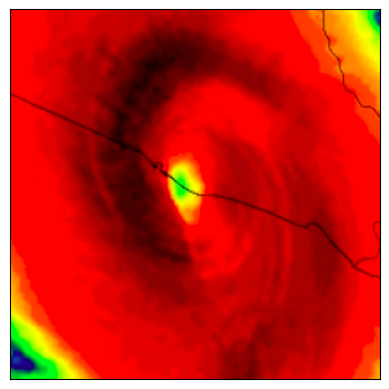

In [ ]:
#ITERATE THROUGH IMAGES OF OTIS THE DAY BEFORE IT HIT LAND

hour = 0

while (hour < 7):

  if user.lower() == "thardchi":
    sample1 = f'/content/drive/MyDrive/APS360_Team_11_Project_Folder/Final_Deliverable/The_HurriScan_Project_Implementation_of_the_Top_Performing_Model/sample/25-10-2023-{hour}-UTC.png'
  elif user.lower() == "sean":
    sample1 = f'/content/drive/MyDrive/University/Third_Year/APS360/APS360_Project/Final_Deliverable/The_HurriScan_Project_Implementation_of_the_Top_Performing_Model/sample/25-10-2023-{hour}-UTC.png'
  elif user.lower() == "charlotte":
    sample1 = "CHARLOTTE PATH"
  data_transform = transforms.Compose([
      transforms.Resize((224, 224)),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
  ])

  image = Image.open(sample1)
  image = image.convert("RGB")
  plt.imshow(image), plt.xticks([]), plt.yticks([])
  image = data_transform(image)
  image = image.unsqueeze(0)  # Add batch dimension

  # Forward pass through AlexNet
  features = alexNet.features(image)

  # Forward pass through classifier
  output = model(features)
  print(output)

  # Apply softmax
  probabilities = F.softmax(output, dim=1)

  # Output predicted class
  predicted_class = torch.argmax(probabilities, dim=1).item()
  print(f"Day: 25th October 2023 ; Hour: {hour}")
  print(f"Predicted class: {predicted_class}, Probability: {probabilities[0][predicted_class]:.4f}")

  hour += 1

## Qualitative Analysis on Validation Set

In [ ]:
#LOAD ALL OF THE DATA

torch.manual_seed(1) # set the random seed
# loading and transforming data using ImageFolder
data_transform = transforms.Compose([
    # ensure all images are 224x224
    transforms.Resize((224, 224)),
    # convert images to PyTorch tensors
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# using torchvision.datasets.ImageFolder...
dataset = None
if user.lower() == "charlotte":
  dataset = datasets.ImageFolder('/content/drive/MyDrive/APS360_Team_11_Project_Folder/Final_Deliverable/The_HurriScan_Project_Implementation_of_the_Top_Performing_Model/new_split_data/train', transform=data_transform)
elif user.lower() == "sean":
  dataset = datasets.ImageFolder('/content/drive/MyDrive/University/Third_Year/APS360/APS360_Project/Final_Deliverable/The_HurriScan_Project_Implementation_of_the_Top_Performing_Model/new_split_data/train', transform=data_transform)
# so now all the images are stored in one dataset. we will segment this dataset.

# classes are folders in each directory with these names
classes = ['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5']

torch.manual_seed(1) # set the random seed

# get the relevant indices for splitting
train_indices, val_indices = train_test_split(np.arange(len(dataset)),
                                      train_size = 0.8, random_state = 42)
# and then load in as datasets for each subset
train_data = Subset(dataset, train_indices)
val_data = Subset(dataset, val_indices)

# define dataloader parameters
batch_size  = 64
num_workers = 0

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                           num_workers=num_workers, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size,
                                          num_workers=num_workers, shuffle=True)

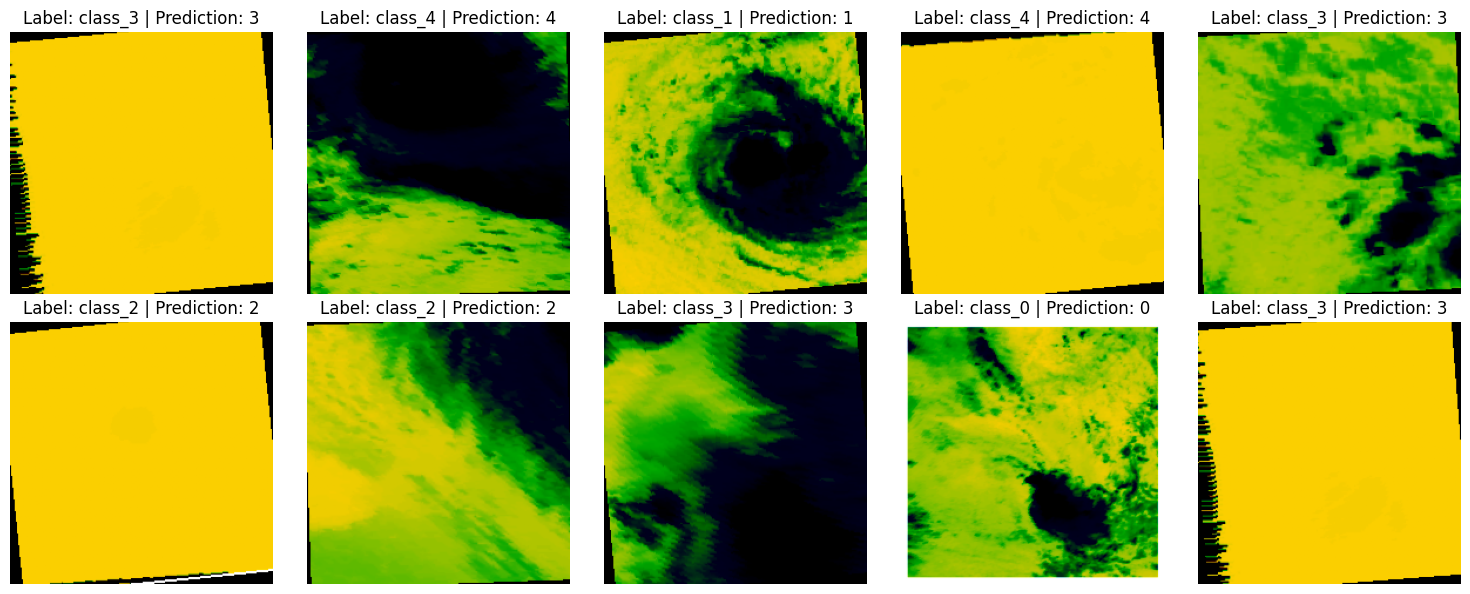

In [ ]:
#NOW PRINT IMAGE, LABEL AND PREDICTION
import matplotlib.pyplot as plt
import numpy as np

# obtain one batch of training images
dataiter = iter(val_loader)
images, labels = next(dataiter)
imagesNP = images.numpy()  # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))

for idx, ax in enumerate(axes.flatten()):
    img = np.transpose(imagesNP[idx], (1, 2, 0))
    img = np.clip(img, 0, 1)  # clip values to the valid range for imshow
    ax.imshow(img)

    #Run model on image
    # Forward pass through AlexNet
    features = alexNet.features(images[idx])

    # Forward pass through classifier
    output = model(features)

    # Apply softmax
    probabilities = F.softmax(output, dim=1)

    # Output predicted class
    predicted_class = torch.argmax(probabilities, dim=1).item()

    title = f"Label: {classes[labels[idx]]} | Prediction: {predicted_class}"
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

## Let us see how the model performs on some of the "amorphous" images in our data

In [ ]:
#LOAD THE AMORPHOUS DATA

torch.manual_seed(1) # set the random seed
# loading and transforming data using ImageFolder
data_transform = transforms.Compose([
    # ensure all images are 224x224
    transforms.Resize((224, 224)),
    # convert images to PyTorch tensors
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# using torchvision.datasets.ImageFolder...
dataset = None
if user.lower() == "charlotte":
  dataset = datasets.ImageFolder('/content/drive/MyDrive/APS360_Team_11_Project_Folder/Final_Deliverable/The_HurriScan_Project_Implementation_of_the_Top_Performing_Model/new_split_data/amorphous', transform=data_transform)
elif user.lower() == "sean":
  dataset = datasets.ImageFolder('/content/drive/MyDrive/University/Third_Year/APS360/APS360_Project/Final_Deliverable/The_HurriScan_Project_Implementation_of_the_Top_Performing_Model/new_split_data/amorphous', transform=data_transform)
# so now all the images are stored in one dataset. we will segment this dataset.

# classes are folders in each directory with these names
classes = ['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5']

torch.manual_seed(1) # set the random seed

# define dataloader parameters
batch_size  = 64
num_workers = 0

# prepare data loaders
amorphous_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                          num_workers=num_workers, shuffle=True)

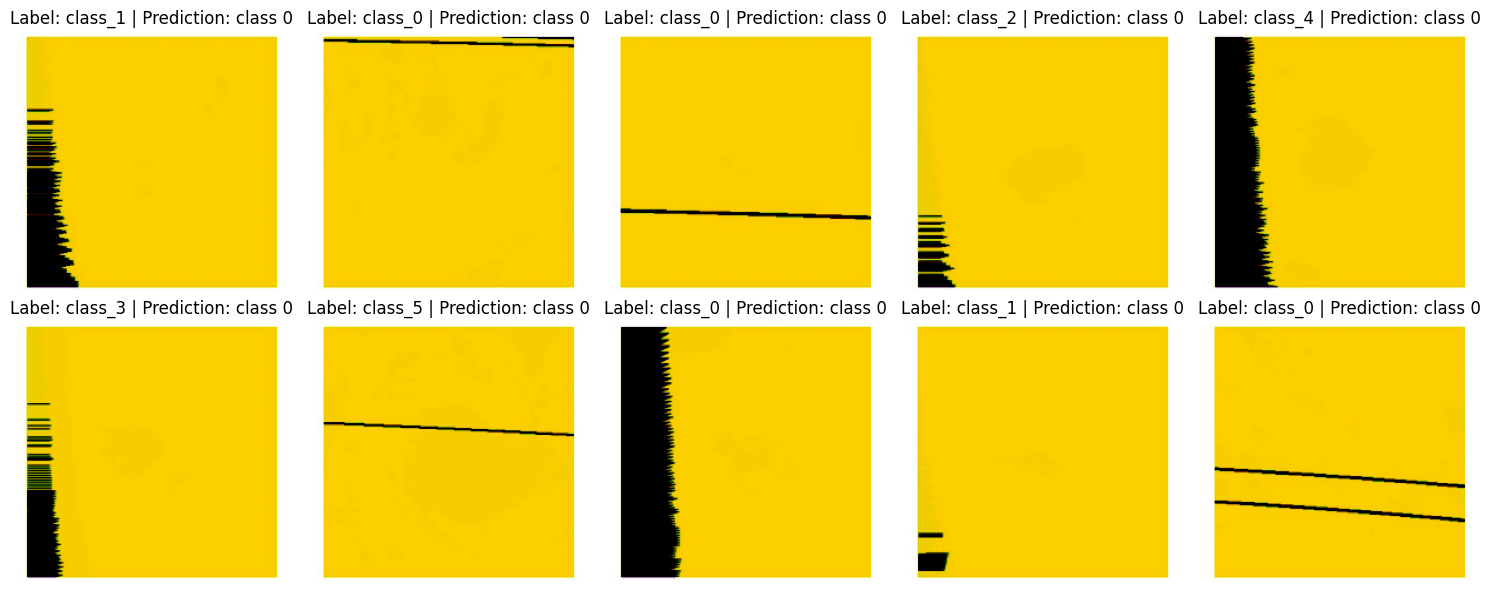

In [ ]:
#NOW PRINT IMAGE, LABEL AND PREDICTION
import matplotlib.pyplot as plt
import numpy as np

# obtain one batch of training images
dataiter = iter(amorphous_loader)
images, labels = next(dataiter)
imagesNP = images.numpy()  # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))

for idx, ax in enumerate(axes.flatten()):
    img = np.transpose(imagesNP[idx], (1, 2, 0))
    img = np.clip(img, 0, 1)  # clip values to the valid range for imshow
    ax.imshow(img)

    #Run model on image
    # Forward pass through AlexNet
    features = alexNet.features(images[idx])

    # Forward pass through classifier
    output = model(features)

    # Apply softmax
    probabilities = F.softmax(output, dim=1)

    # Output predicted class
    predicted_class = torch.argmax(probabilities, dim=1).item()

    title = f"Label: {classes[labels[idx]]} | Prediction: class {predicted_class}"
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()